In [1]:
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css"
).text
HTML(styles)


In [5]:
import re
import requests
from time import sleep
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_validate

import scipy
scipy.test()

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.utils import class_weight



%matplotlib inline



============================= test session starts ==============================
platform darwin -- Python 3.8.3, pytest-5.4.3, py-1.9.0, pluggy-0.13.1
rootdir: /Users/luisfer/OneDrive - Harvard University/One Drive/1. Académico/Harvard/Academic Year 2020-2021/Fall 2020/COMPSCI-109 Intro DS/Final Project/cs109-final-project
collected 32811 items / 10743 deselected / 22068 selected

_build_utils/tests/test_circular_imports.py .                            [  0%]
_build_utils/tests/test_scipy_version.py .                               [  0%]
_lib/tests/test__gcutils.py ......                                       [  0%]
_lib/tests/test__pep440.py .........                                     [  0%]
_lib/tests/test__testutils.py ..                                         [  0%]
_lib/tests/test__threadsafety.py ..                                      [  0%]
_lib/tests/test__util.py ...............                                 [  0%]
_lib/tests/test_ccallback.py ....                      

..................x......................                                [ 21%]
interpolate/tests/test_fitpack.py ................s...                   [ 21%]
interpolate/tests/test_fitpack2.py ..................................... [ 21%]
.......                                                                  [ 21%]
interpolate/tests/test_interpnd.py .....................                 [ 21%]
interpolate/tests/test_interpolate.py .................................. [ 21%]
........................................................................ [ 22%]
................................................                         [ 22%]
interpolate/tests/test_ndgriddata.py ............                        [ 22%]
interpolate/tests/test_pade.py ....                                      [ 22%]
interpolate/tests/test_polyint.py ...................................... [ 22%]
............                                                             [ 22%]
interpolate/tests/test_rbf.py ..........

misc/tests/test_doccer.py .....                                          [ 39%]
ndimage/tests/test_c_api.py ...                                          [ 39%]
ndimage/tests/test_datatypes.py ..                                       [ 39%]
ndimage/tests/test_filters.py ..........................                 [ 39%]
ndimage/tests/test_measurements.py ..................................... [ 39%]
.....................................................................    [ 40%]
ndimage/tests/test_morphology.py .....                                   [ 40%]
ndimage/tests/test_ndimage.py .......................................... [ 40%]
........................................................................ [ 40%]
........................................................................ [ 41%]
........................................................................ [ 41%]
........................................................................ [ 41%]
................                        

........................................................................ [ 55%]
........................................................................ [ 55%]
........................................................................ [ 56%]
........................................................................ [ 56%]
........................................................................ [ 56%]
........................................................................ [ 56%]
........................................................................ [ 57%]
........................................................................ [ 57%]
........................................................................ [ 57%]
.........................................................ss............. [ 58%]
........................................................................ [ 58%]
.....................                                                    [ 58%]
signal/tests/test_spectral.py ..........

spatial/transform/tests/test_rotation_spline.py .......                  [ 73%]
special/tests/test_basic.py ............................................ [ 73%]
........x...X........................................................... [ 74%]
........................................................................ [ 74%]
........................................................................ [ 74%]
........................................................................ [ 75%]
........................................................................ [ 75%]
.........................                                                [ 75%]
special/tests/test_bdtr.py ........................                      [ 75%]
special/tests/test_boxcox.py ........                                    [ 75%]
special/tests/test_cdflib.py .                                           [ 75%]
special/tests/test_cython_special.py ................................... [ 76%]
.................xxxxx..xx..xx..........

.....s.......s.......s.....ssssssss..s.......s.......s.......s.......s.. [ 92%]
...ssssssss..s.......s.......s.......s.......s.....ssssssss..s.......s.. [ 93%]
.....s.......s.......s.....ssssssss..s.......s.......s.......s.......s.. [ 93%]
...ssssssss..s.......s.......s.......s.......s.....ssssssss..s.......s.. [ 93%]
.....s.......s.......s.....ssssssss..s.......s.......s.......s.......s.. [ 94%]
...ssssssss..s.......s.......s.......s.......s.....ssssssss..s.......s.. [ 94%]
.....s.......s.......s.....ssssssss..s.......s.......s.......s.......s.. [ 94%]
...ssssssss..s.......s.......s.......s.......s.....ssssssss..s.......s.. [ 95%]
.....s.......s.......s.....ssssssss..s.......s.......s.......s.......s.. [ 95%]
...ssssssss..s.......s.......s.......s.......s.....ssssssss..s.......s.. [ 95%]
.....s.......s.......s.....ssssssss..s.......s.......s.......s.......s.. [ 96%]
...ssssssss..s.......s.......s..........                                 [ 96%]
stats/tests/test_morestats.py ..........

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [25]:
import seaborn as sns
from sklearn import metrics



## Data Set

In [6]:
# Load data
df = pd.read_csv('data/df_fifa.csv')

In [7]:
list(df.year.unique())

[2015, 2016, 2017, 2018, 2019, 2020]

In [8]:
#Response Variable "Main Position"

list(df['main_position'].unique())

['CF',
 'LW',
 'RM',
 'ST',
 'GK',
 'LM',
 'CM',
 'CDM',
 'CB',
 'CAM',
 'RW',
 'RB',
 'LB',
 'LWB',
 'RWB']

## Data Handling

In [9]:
# New Response Variable "General Position"

d = {'CF': 'Forward', 'LW': 'Forward', 'RM': 'Midfilder', 'ST': 'Forward', 'GK': 'Goalkeeper', 'LM':'Midfilder',
    'CM':'Midfilder', 'CDM':'Midfilder', 'CB':'Defender', 'CAM':'Midfilder', 'RW':'Forward', 'RB':'Defender', 
     'LB':'Defender', 'LWB': 'Defender', 'RWB': 'Defender'}

df['main_position_g'] = df['main_position'].replace(to_replace=d)

In [10]:
# X and y variables

# Filter for year 2019 and 2020

df_19 = df[df['year'] == 2019]
df_20 = df[df['year'] == 2020]

# Dropping variables not related with position

drop_vars = ['sofifa_id','short_name','dob','nationality','club','wage_eur','preferred_foot','work_rate','body_type',
             'team_position','team_jersey_number','joined','contract_valid_until','league_name','release_clause_eur',
             'loaned_from','main_position','year', 'main_position_g']

#Train Variables
X_train   = df_19.drop(drop_vars, axis=1)

#The following variables were dropped because they will bias the algorithm 
#Some of them are exclusive for goalkeeper

nans = pd.DataFrame(X_train.isnull().sum())
nans= nans.rename(columns={0 : "name"})
nans = nans[nans['name'] != 0]
nans
names = list(nans.index)

X_train   = X_train.drop(names, axis=1)
y_train_1 = df_19['main_position'].astype('category')
y_train_2 = df_19['main_position_g'].astype('category')

#Test Variables


X_test   = df_20.drop(drop_vars, axis=1)
X_test   = X_test.drop(names, axis=1)
y_test_1 = df_20['main_position'].astype('category')
y_test_2 = df_20['main_position_g'].astype('category')


In [11]:
# standardization 
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [12]:
sns.violinplot(y=X_train['overall'], x=y_train_2, split=True);

NameError: name 'sns' is not defined

## Base Model: Logistic Multiclassification Model (OvR)

In [13]:
#Logistic multiclass with ridge-like regularization

# Model with all positions
logit_ovr = LogisticRegression(penalty='l2', multi_class='ovr',max_iter = 1000)
logit_ovr.fit(X_train_s, y_train_1)
y_pred_1 = logit_ovr.predict(X_test_s)
accu1 = accuracy_score(y_test_1, y_pred_1)

print(f'The accuracy of the model with full positions is {accu1:.4f}')

# Models grouping positions
logit_ovr2 = LogisticRegression(penalty='l2', multi_class='ovr',max_iter = 1000)
logit_ovr2.fit(X_train_s, y_train_2)
y_pred_2 = logit_ovr2.predict(X_test_s)
accu2 = accuracy_score(y_test_2, y_pred_2)

print(f'The accuracy of the model with grouping positions is {accu2:.4}')

The accuracy of the model with full positions is 0.8651
The accuracy of the model with grouping positions is 0.9514


## Decision Tree with Cross Validation

In [14]:
depths = list(range(1, 21))


def calc_meanstd(X_train, y_train, depths):
    # your code here
    train_scores= []
    cvmeans= []
    cvstds= []

    for depth in depths:
        detree=DecisionTreeClassifier(max_depth = depth)
        train_scores.append(detree.fit(X_train, y_train).score(X_train, y_train))
        scores=cross_val_score(estimator= detree, X= X_train, y= y_train, cv= 5)
        cvmeans.append(scores.mean())
        cvstds.append(scores.std())
        
    # end of your code here
    return cvmeans, cvstds, train_scores

cvmeans_1, cvstds_1, train_scores_1= calc_meanstd(X_train_s, y_train_1, depths)
cvmeans_2, cvstds_2, train_scores_2= calc_meanstd(X_train_s, y_train_2, depths)

In [15]:


fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(depths, train_scores_1, 'o-', color = 'teal',  label = "Non-CV Training scores")
ax[0].plot(depths, cvmeans_1, '^-', color= 'purple' ,label = "CV Mean")
ax[0].set_xlabel("Tree-depth")
ax[0].set_ylabel("Accuracy")
ax[0].set_title('Accuracy in Training and Test Sets for depths ranging from 1 to 20: ')
ax[0].legend();

ax[1].plot(depths, train_scores_2, 'o-', color = 'teal',  label = "Non-CV Training scores")
ax[1].plot(depths, cvmeans_2, '^-', color= 'purple' ,label = "CV Mean")
ax[1].set_xlabel("Tree-depth")
ax[1].set_ylabel("Accuracy")
ax[1].set_title('Accuracy in Training and Test Sets for depths ranging from 1 to 20: General Positions')
ax[1].legend();

In [16]:
#Pick the best depth:

depth_1 = list(cvmeans_1).index(max(cvmeans_1))+1
depth_2 = list(cvmeans_2).index(max(cvmeans_2))+1
tree_1  = DecisionTreeClassifier(max_depth = depth_1)
tree_2  = DecisionTreeClassifier(max_depth = depth_2)


best_cv_tree_test_score_1= tree_1.fit(X_train_s, y_train_1).score(X_test_s, y_test_1)
best_cv_tree_test_score_2= tree_2.fit(X_train_s, y_train_2).score(X_test_s, y_test_2)

y_pred_test_DT_1 = tree_1.predict(X_test_s)
y_pred_test_DT_2 = tree_2.predict(X_test_s)

print(f'The best tree depth is {depth_1}, with test accuracy of {best_cv_tree_test_score_1:.4f} and for the grouped positions the tree depth is {depth_2} with test accuracy of {best_cv_tree_test_score_2:.4f}')
print('Regularizing depth is no enough to improve the accuracy of the model in both cases')

The best tree depth is 11, with test accuracy of 0.8263 and for the grouped positions the tree depth is 7 with test accuracy of 0.9380
Regularizing depth is no enough to improve the accuracy of the model in both cases


## AdaBoosting

* We are using the depth found in the previous analysis

In [17]:
boost_1 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = depth_1), 
                           n_estimators=800, learning_rate=1, algorithm = 'SAMME')
adda_1 = boost_1.fit(X_train_s, y_train_1)
gen_train_1 = list(boost_1.staged_score(X_train_s, y_train_1))
gen_test_1  = list(boost_1.staged_score(X_test_s, y_test_1))

In [18]:
boost_2 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = depth_2), 
                           n_estimators=800, learning_rate=1, algorithm = 'SAMME')
adda_2      = boost_2.fit(X_train_s, y_train_2)
gen_train_2 = list(boost_1.staged_score(X_train_s, y_train_2))
gen_test_2  = list(boost_1.staged_score(X_test_s, y_test_2))

In [19]:
y_pred_boost_1 = adda_1.predict(X_test_s)
y_pred_boost_2 = adda_2.predict(X_test_s)

In [20]:
accu_adaboost_1 = accuracy_score(y_test_1, y_pred_boost_1)
accu_adaboost_2 = accuracy_score(y_test_2, y_pred_boost_2)

In [22]:
print(f'The test accuracy of the Adaoosting Model for all positions {accu_adaboost_1:.4f}')
print(f'The test accuracy of the Adaoosting Model for grouped positions {accu_adaboost_2:.4f}')

The test accuracy of the Adaoosting Model for all positions 0.8825
The test accuracy of the Adaoosting Model for grouped positions 0.9619


## XGBoost

In [95]:
class_weights = list(class_weight.compute_class_weight('balanced',np.unique(y_train_2),y_train_2))
w_array = np.ones(y_train_2.shape[0], dtype = 'float')

for i in range(len(y_train_2)):
    w_array[i] = class_weights[int(np.array(y_train_2.cat.codes)[i])]

# set parameters
param_space = {'min_child_weight': hp.loguniform('min_child_weight', np.log(1), np.log(10)),
               'max_depth': hp.quniform('max_depth', 3, 9, 1),
               'subsample': hp.quniform('subsample', 0.6, 0.95, 0.05),
               'colsample_bytree': hp.quniform('colsample_bytree', 0.6, 0.95, 0.05),
               'gamma': hp.loguniform('gamma', np.log(1e-8), np.log(1.0)),
               'reg_alpha': hp.loguniform('reg_alpha', np.log(1e-8), np.log(1.0)),
               'reg_lambda': hp.loguniform('reg_lambda', np.log(1e-6), np.log(10.0))}

# define score function
def score(params):
    xgb = XGBClassifier(random_state=81,
                        min_child_weight=params['min_child_weight'],
                        max_depth=int(params['max_depth']), 
                        subsample=params['subsample'], 
                        colsample_bytree=params['colsample_bytree'],
                        gamma=params['gamma'], 
                        reg_alpha=params['reg_alpha'], 
                        reg_lambda=params['reg_lambda'],
                        sample_weight=w_array)
    scores = cross_validate(xgb, 
                            X=X_train_s, 
                            y=y_train_2, 
                            cv=5, 
                            scoring='accuracy')
    return scores['test_score'].mean()

/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=['Defender' 'Forward' 'Goalkeeper' 'Midfilder'], y=64947       Forward
64948       Forward
64949       Forward
64950    Goalkeeper
64951     Midfilder
            ...    
82712     Midfilder
82713       Forward
82714     Midfilder
82715      Defender
82716     Midfilder
Name: main_position_g, Length: 17770, dtype: category
Categories (4, object): ['Defender', 'Forward', 'Goalkeeper', 'Midfilder'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [98]:
max_evals = 100
trials = Trials()
history = []
rstate = np.random.RandomState(80)
best_params = fmin(score, param_space, algo=tpe.suggest, trials=trials, max_evals=max_evals, rstate=rstate)

# refit with the best parameters
xgb_best = XGBClassifier(random_state=81,
                         min_child_weight=best_params['min_child_weight'],
                         max_depth=int(best_params['max_depth']), 
                         subsample=best_params['subsample'], 
                         colsample_bytree=best_params['colsample_bytree'],
                         gamma=best_params['gamma'], 
                         reg_alpha=best_params['reg_alpha'], 
                         reg_lambda=best_params['reg_lambda'],
                          n_jobs=-1)

xgb_best.fit(X_train_s, y_train_2, sample_weight=w_array)


100%|██████████| 100/100 [4:35:59<00:00, 165.59s/trial, best loss: 0.9436128306133934] 


XGBClassifier(colsample_bytree=0.9500000000000001, gamma=1.6823183620667393e-07,
              max_depth=5, min_child_weight=1.8962217821770893, n_jobs=-1,
              objective='multi:softprob', random_state=81,
              reg_alpha=0.03631202144298734, reg_lambda=2.4920796655392454e-06,
              subsample=0.8)

In [103]:
y_pred_test_xgb_2 = xgb_best.predict(X_test_s)
accu_boost_2 = accuracy_score(y_test_2, y_pred_test_xgb)
print(accu_boost_2)

0.9574898785425101


In [100]:
class_weights = list(class_weight.compute_class_weight('balanced',np.unique(y_train_1),y_train_1))
w_array_1 = np.ones(y_train_1.shape[0], dtype = 'float')

for i in range(len(y_train_1)):
    w_array_1[i] = class_weights[int(np.array(y_train_1.cat.codes)[i])]

# set parameters
param_space = {'min_child_weight': hp.loguniform('min_child_weight', np.log(1), np.log(10)),
               'max_depth': hp.quniform('max_depth', 3, 9, 1),
               'subsample': hp.quniform('subsample', 0.6, 0.95, 0.05),
               'colsample_bytree': hp.quniform('colsample_bytree', 0.6, 0.95, 0.05),
               'gamma': hp.loguniform('gamma', np.log(1e-8), np.log(1.0)),
               'reg_alpha': hp.loguniform('reg_alpha', np.log(1e-8), np.log(1.0)),
               'reg_lambda': hp.loguniform('reg_lambda', np.log(1e-6), np.log(10.0))}

# define score function
def score(params):
    xgb = XGBClassifier(random_state=81,
                        min_child_weight=params['min_child_weight'],
                        max_depth=int(params['max_depth']), 
                        subsample=params['subsample'], 
                        colsample_bytree=params['colsample_bytree'],
                        gamma=params['gamma'], 
                        reg_alpha=params['reg_alpha'], 
                        reg_lambda=params['reg_lambda'],
                        sample_weight=w_array_1)
    scores = cross_validate(xgb, 
                            X=X_train_s, 
                            y=y_train_1, 
                            cv=5, 
                            scoring='accuracy')
    return scores['test_score'].mean()

/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=['CAM' 'CB' 'CDM' 'CF' 'CM' 'GK' 'LB' 'LM' 'LW' 'LWB' 'RB' 'RM' 'RW' 'RWB'
 'ST'], y=64947     ST
64948     CF
64949     LW
64950     GK
64951    CAM
        ... 
82712     CM
82713     ST
82714     CM
82715     RB
82716     CM
Name: main_position, Length: 17770, dtype: category
Categories (15, object): ['CAM', 'CB', 'CDM', 'CF', ..., 'RM', 'RW', 'RWB', 'ST'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [101]:
max_evals = 100
trials = Trials()
history = []
rstate = np.random.RandomState(80)
best_params = fmin(score, param_space, algo=tpe.suggest, trials=trials, max_evals=max_evals, rstate=rstate)

# refit with the best parameters
xgb_best_1 = XGBClassifier(random_state=81,
                         min_child_weight=best_params['min_child_weight'],
                         max_depth=int(best_params['max_depth']), 
                         subsample=best_params['subsample'], 
                         colsample_bytree=best_params['colsample_bytree'],
                         gamma=best_params['gamma'], 
                         reg_alpha=best_params['reg_alpha'], 
                         reg_lambda=best_params['reg_lambda'],
                          n_jobs=-1)

xgb_best_1.fit(X_train_s, y_train_1, sample_weight=w_array_1)

100%|██████████| 100/100 [14:03:30<00:00, 506.10s/trial, best loss: 0.7810917276308385] 


XGBClassifier(colsample_bytree=0.8500000000000001, gamma=0.0011681914593867173,
              max_depth=9, min_child_weight=1.5304446526775661, n_jobs=-1,
              objective='multi:softprob', random_state=81,
              reg_alpha=0.02375321636065586, reg_lambda=0.0015887790208132591,
              subsample=0.9500000000000001)

In [102]:
y_pred_test_xgb_1 = xgb_best_1.predict(X_test_s)
accu_boost_1 = accuracy_score(y_test_1, y_pred_test_xgb_1)
print(accu_boost_1)

0.882755224860488


## Random Forest

In [ ]:
random_state = 0
depths = list(range(20,31))
n_trees = 55

number_of_features = X_train_s.shape[1]
n_features = round(number_of_features ** (1))

accus_train_1 = []
accus_test_1  = []


for i in depths:
    random_forest = RandomForestClassifier(max_depth = i, 
                        random_state = random_state,
                        n_estimators = n_trees,
                        max_features = n_features)
    random_forest.fit(X_train_s, y_train_1)
    predictions_train_1 = random_forest.predict(X_train_s)
    predictions_test_1  = random_forest.predict(X_test_s)
    accus_train_1.append(accuracy_score(y_train_1,predictions_train_1))
    accus_test_1.append(accuracy_score(y_test_1, predictions_test_1))

best_depth_1    = depths[accus_test_1.index(max(accus_test_1))]

random_forest_best_1 = RandomForestClassifier(max_depth = best_depth_1, 
                        random_state = random_state,
                        n_estimators = n_trees,
                        max_features = n_features)
random_forest_best_1.fit(X_train_s, y_train_1)
y_train_pred__rf_1 = random_forest_best_1.predict(X_train_s)
y_test_pred__rf_1  = random_forest_best_1.predict(X_test_s)

train_accuracy_1 = max(accus_train_1)
test_accuracy_1  = max(accus_test_1)

accus_train_2 = []
accus_test_2  = []

for i in depths:
    random_forest = RandomForestClassifier(max_depth = i, 
                        random_state = random_state,
                        n_estimators = n_trees,
                        max_features = n_features)
    random_forest.fit(X_train_s, y_train_2)
    predictions_train_2 = random_forest.predict(X_train_s)
    predictions_test_2  = random_forest.predict(X_test_s)
    accus_train_2.append(accuracy_score(y_train_2,predictions_train_2))
    accus_test_2.append(accuracy_score(y_test_2, predictions_test_2))


    
best_depth_2     = depths[accus_test_2.index(max(accus_test_2))]
random_forest_best = RandomForestClassifier(max_depth = best_depth_2, 
                        random_state = random_state,
                        n_estimators = n_trees,
                        max_features = n_features)
random_forest_best.fit(X_train_s, y_train_2)
y_train_pred__rf_2 = random_forest_best.predict(X_train_s)
y_test_pred__rf_2 = random_forest_best.predict(X_test_s)
train_accuracy_2 = accuracy_score(y_train_2,y_train_pred__rf_2)
test_accuracy_2  = accuracy_score(y_test_2,y_test_pred__rf_2)



In [112]:
print(f'The test accuracy of the Random Forest Model for all positions {test_accuracy_1:.4f}')
print(f'The test accuracy of the Random Forest Model for grouped positions {test_accuracy_1:.4f}')

The test accuracy of the Random Forest Model for all positions 0.8681
The test accuracy of the Randmo Forest Model for grouped positions 0.9579


### Summary Table of Accuracies by Model and Response Variable

In [126]:
results = [['Logistic',  accu1, accu2],
        ['Decision Tree Cross Validation', best_cv_tree_test_score_1, best_cv_tree_test_score_2],
        ['AdaBoosting', accu_adaboost_1, accu_adaboost_2],
        ['XGBoost', accu_boost_1, accu_boost_2],
        ['Random Forest', test_accuracy_1, test_accuracy_2]]
results_df = pd.DataFrame(results, columns= ['Classifier', 'All Positions', 'Grouped Positions'])               
results_df

,Classifier,All Positions,Grouped Positions
0,Logistic,0.865138,0.951362
1,Decision Tree Cross Validation,0.826239,0.937903
2,AdaBoosting,0.885436,0.962250
3,XGBoost,0.882755,0.957490
4,Random Forest,0.868093,0.957873


## Beyond Accuracy: Precision and Recall 

Precision: the number of true positives divided by the number of true positives plus the number of false positives. Precision expresses the proportion of the data points our model says was relevant actually were relevant.


$$ Precision = \dfrac{true\ positives}{\textstyle true\ positives\ +\ false\ positives} $$

Recall: the number of true positives divided by the number of true positives plus the number of false negatives. The ability of a model to find all the relevant cases within a dataset

$$ Recall = \dfrac{true\ positives}{\textstyle true\ positives\ +\ false\ negatives} $$

### Precision and Recall of the All Positions: Average of Classes


In [129]:
results = [['Logistic',  precision_score(y_test_1, y_pred_1,  average='macro'), recall_score(y_test_1, y_pred_1,  average='macro')],
        ['Decision Tree Cross Validation', precision_score(y_test_1, y_pred_test_DT_1,  average='macro'), recall_score(y_test_1, y_pred_test_DT_1,  average='macro')],
        ['AdaBoosting', precision_score(y_test_1, y_pred_boost_1,  average='macro'), recall_score(y_test_1, y_pred_boost_1,  average='macro')],
        ['XGBoost', precision_score(y_test_1, y_pred_test_xgb_1,  average='macro'), recall_score(y_test_1, y_pred_test_xgb_1,  average='macro')],
        ['Random Forest', precision_score(y_test_1, y_test_pred__rf_1,  average='macro'), recall_score(y_test_1, y_test_pred__rf_1,  average='macro')]
       ]
results_precrec_df = pd.DataFrame(results, columns= ['Classifier', 'Precision', 'Recall'])               
results_precrec_df


,Classifier,Precision,Recall
0,Logistic,0.783036,0.719557
1,Decision Tree Cross Validation,0.686805,0.616278
2,AdaBoosting,0.837657,0.751672
3,XGBoost,0.799405,0.791875
4,Random Forest,0.815671,0.715167


### Precision and Recall by Class AdaBoost and XGBoost: All Positions

In [148]:
print(classification_report(y_test_1, y_pred_boost_1, labels=list(df['main_position'].unique())))
print(classification_report(y_test_1, y_pred_test_xgb_1, labels=list(df['main_position'].unique())))

              precision    recall  f1-score   support

          CF       0.79      0.37      0.51       113
          LW       0.69      0.76      0.72       378
          RM       0.75      0.72      0.74      1050
          ST       0.93      0.96      0.95      2582
          GK       1.00      1.00      1.00      2036
          LM       0.75      0.74      0.74      1049
          CM       0.86      0.89      0.87      2193
         CDM       0.85      0.85      0.85      1424
          CB       0.96      0.95      0.96      3162
         CAM       0.81      0.82      0.82      1146
          RW       0.75      0.58      0.65       369
          RB       0.87      0.92      0.89      1314
          LB       0.89      0.93      0.91      1303
         LWB       0.91      0.44      0.60        90
         RWB       0.74      0.33      0.46        69

    accuracy                           0.89     18278
   macro avg       0.84      0.75      0.78     18278
weighted avg       0.88   

* We can see that both models are virtually the same in the case of the full positions model

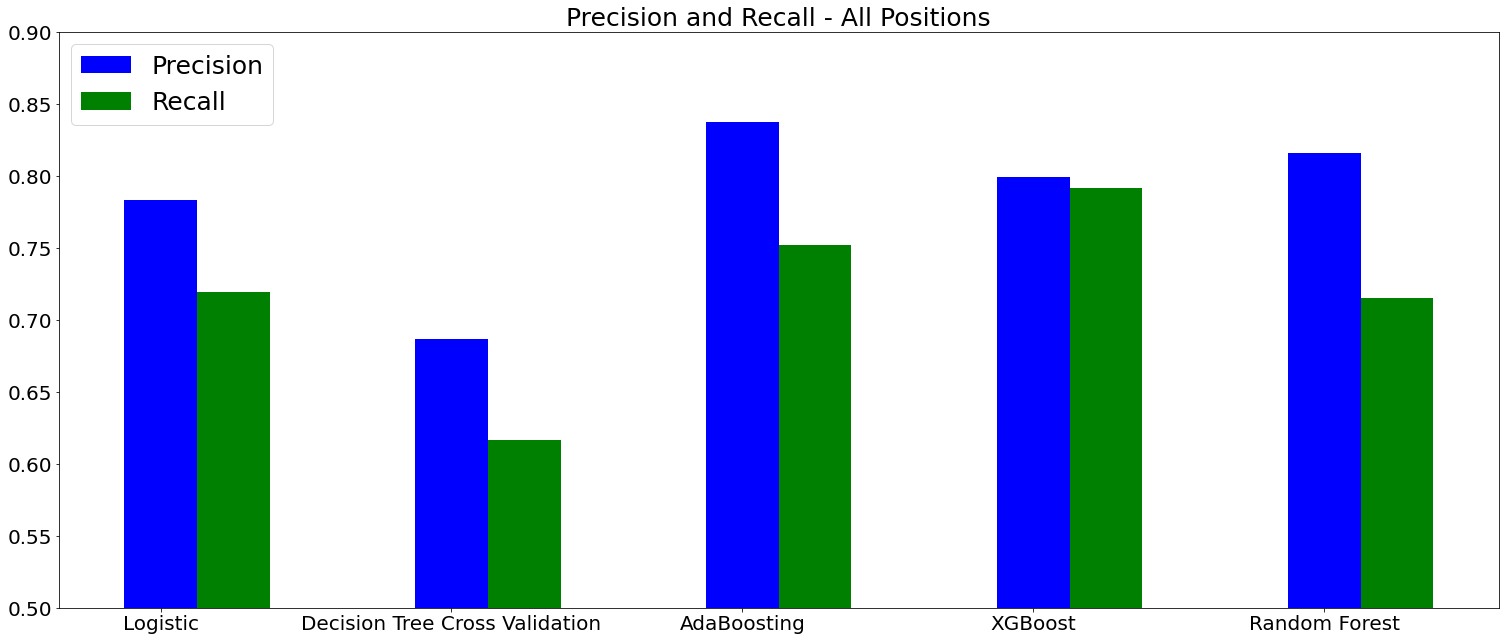

In [160]:
X = np.arange(5)
models = ('Logistic', 'Decision Tree Cross Validation', 'AdaBoosting', 'XGBoost', 'Random Forest')
y_pos  = range(5)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, results_precrec_df['Precision'], color = 'b', width = 0.25, label='Precision' )
ax.bar(X + 0.25, results_precrec_df['Recall'], color = 'g', width = 0.25,  label='Recall')
ax.set_xticks(y_pos)
ax.set_xticklabels(models)
ax.set_ylim((0.5, 0.9))
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_title('Precision and Recall - All Positions', size = 25)
ax.legend(loc = 'upper left', fontsize = 25)
plt.show()

#fig.savefig('Recall_pres1.png', dpi=300)

### Precision and Recall of the Grouped Positions: Average of Classes

In [146]:
print(classification_report(y_test_2, y_pred_boost_2, labels=list(df['main_position_g'].unique())))

              precision    recall  f1-score   support

     Forward       0.94      0.94      0.94      3442
   Midfilder       0.95      0.95      0.95      6862
  Goalkeeper       1.00      1.00      1.00      2036
    Defender       0.98      0.97      0.98      5938

    accuracy                           0.96     18278
   macro avg       0.97      0.97      0.97     18278
weighted avg       0.96      0.96      0.96     18278



In [128]:

results = [['Logistic',  precision_score(y_test_2, y_pred_2,  average='macro'), recall_score(y_test_2, y_pred_2,  average='macro')],
        ['Decision Tree Cross Validation', precision_score(y_test_2, y_pred_test_DT_2,  average='macro'), recall_score(y_test_2, y_pred_test_DT_2,  average='macro')],
        ['AdaBoosting', precision_score(y_test_2, y_pred_boost_2,  average='macro'), recall_score(y_test_2, y_pred_boost_2,  average='macro')],
        ['XGBoost', precision_score(y_test_2, y_pred_test_xgb_2,  average='macro'), recall_score(y_test_2, y_pred_test_xgb_2,  average='macro')],
        ['Random Forest', precision_score(y_test_2, y_test_pred__rf_2,  average='macro'), recall_score(y_test_2, y_test_pred__rf_2,  average='macro')]
       ]
results_precrec_df_g = pd.DataFrame(results, columns= ['Classifier', 'Precision', 'Recall'])               
results_precrec_df_g


,Classifier,Precision,Recall
0,Logistic,0.955722,0.957846
1,Decision Tree Cross Validation,0.945954,0.945159
2,AdaBoosting,0.966680,0.966548
3,XGBoost,0.958766,0.966705
4,Random Forest,0.962266,0.963079


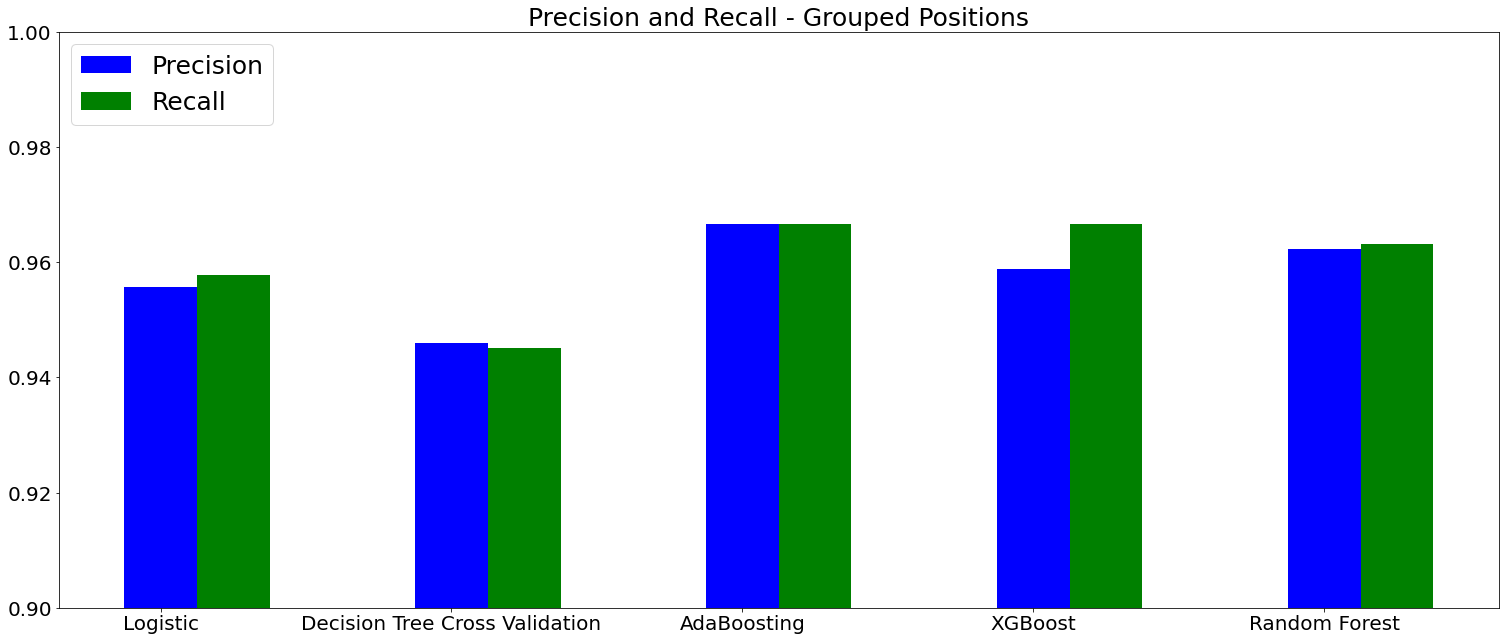

In [161]:
X = np.arange(5)
models = ('Logistic', 'Decision Tree Cross Validation', 'AdaBoosting', 'XGBoost', 'Random Forest')
y_pos  = range(5)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, results_precrec_df_g['Precision'], color = 'b', width = 0.25, label='Precision' )
ax.bar(X + 0.25, results_precrec_df_g['Recall'], color = 'g', width = 0.25,  label='Recall')
ax.set_xticks(y_pos)
ax.set_xticklabels(models)
ax.set_ylim((0.9, 1))
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_title('Precision and Recall - Grouped Positions', size = 25)
ax.legend(loc = 'upper left', fontsize = 25)
plt.show()
fig.savefig('Recall_pres1.png', dpi=300)

### Precision and Recall by Class AdaBoost: All Positions

### AdaBoost is the model that has the better performance in terms of accuracy, precision and recall.

## PCA Decomposition

In [163]:
from sklearn.decomposition import PCA


num_components = 3

# reduce dimensions
pca_transformer = PCA(num_components).fit(X_train_s)
X_train_3d = pca_transformer.transform(X_train_s)
X_test_3d =  pca_transformer.transform(X_test_s)

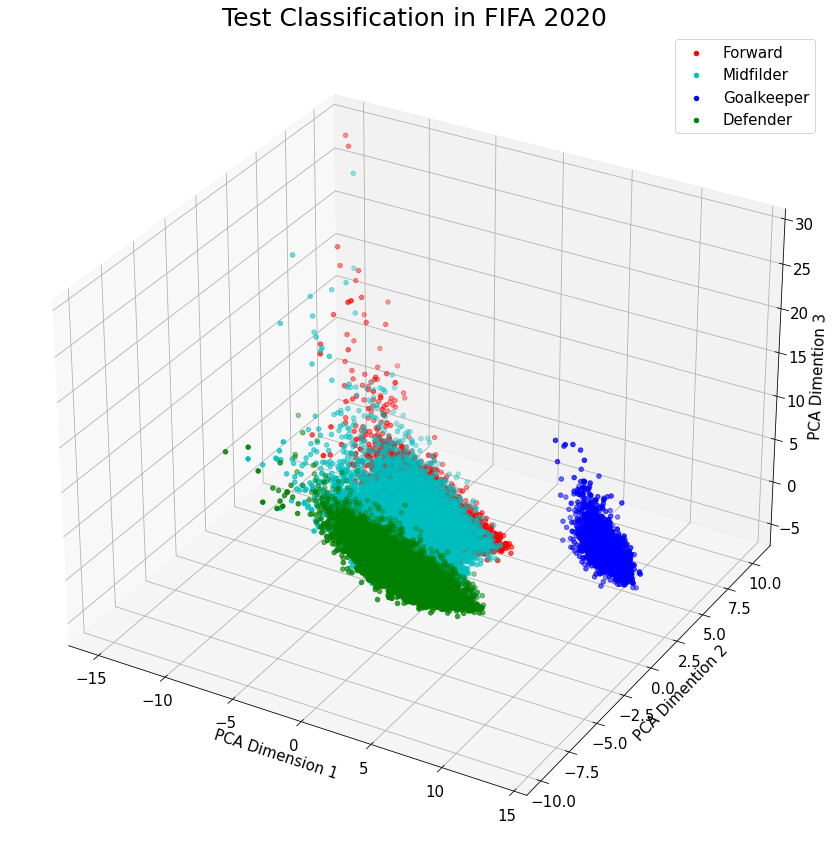

In [172]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')

colors = ['r','c','b', 'g']
names = list(df['main_position_g'].unique())


for pos in names:
    index = names.index(pos)
    pos_gr = X_test_3d[y_test_2==pos]
    ax.scatter3D(pos_gr[:,0], pos_gr[:,1], pos_gr[:,2], c = colors[index], label=names[index])
# all plots need labels
ax.set_xlabel("PCA Dimension 1", size = 15)
ax.set_ylabel("PCA Dimention 2", size = 15)
ax.set_zlabel("PCA Dimention 3", size = 15)
ax.set_title('Test Classification in FIFA 2020', fontsize = 25)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)
ax.legend(fontsize = 15);



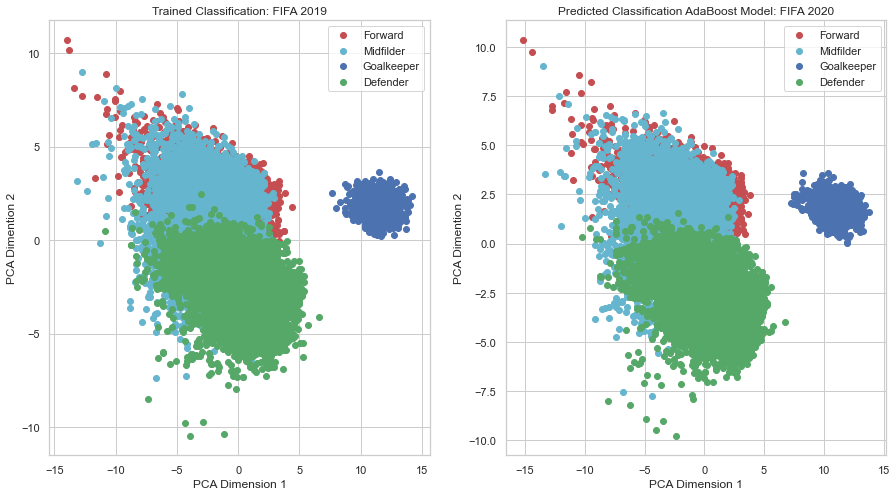

In [60]:
names = list(df['main_position_g'].unique())
colors = ['r','c','b', 'g']

# We loop over the different groups
fig, ax = plt.subplots(1,2, figsize=(15, 8))

for pos in names:
    index = names.index(pos)
    pos_gr = X_train_3d[y_train_2==pos]
    ax[0].scatter(pos_gr[:,0], pos_gr[:,1], c = colors[index], label=names[index])

# all plots need labels
ax[0].set_xlabel("PCA Dimension 1")
ax[0].set_ylabel("PCA Dimention 2")
ax[0].set_title('Trained Classification: FIFA 2019')
ax[0].legend();

for pos in names:
    index = names.index(pos)
    pos_gr = X_test_3d[y_pred_boost_2==pos]
    ax[1].scatter(pos_gr[:,0], pos_gr[:,1], c = colors[index], label=names[index])

# all plots need labels
ax[1].set_xlabel("PCA Dimension 1")
ax[1].set_ylabel("PCA Dimention 2")
ax[1].set_title('Predicted Classification AdaBoost Model: FIFA 2020')
ax[1].legend();

### Confusion Matrix AdaBoost

In [36]:
%matplotlib inline


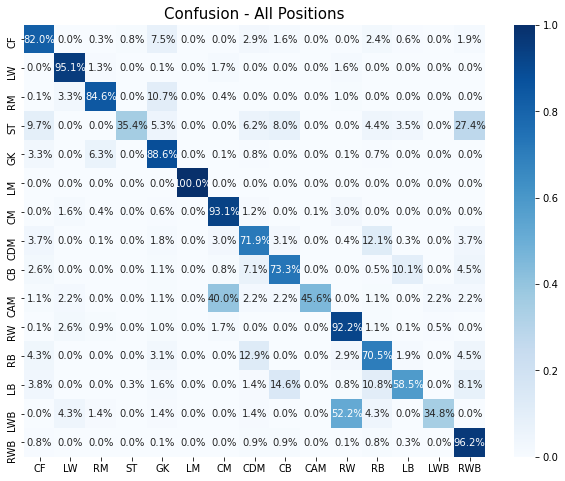

In [48]:
confmat_a = metrics.confusion_matrix(y_test_1, y_pred_boost_1, normalize ='true')
names_1 = list(df['main_position'].unique())

fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0,0,1,1])
sns.heatmap(confmat_a, annot=True, fmt='.1%', cmap='Blues')
ax.set_xticklabels(names_1)
ax.set_yticklabels(names_1)
ax.set_title('Confusion - All Positions', size = 15)
plt.show()

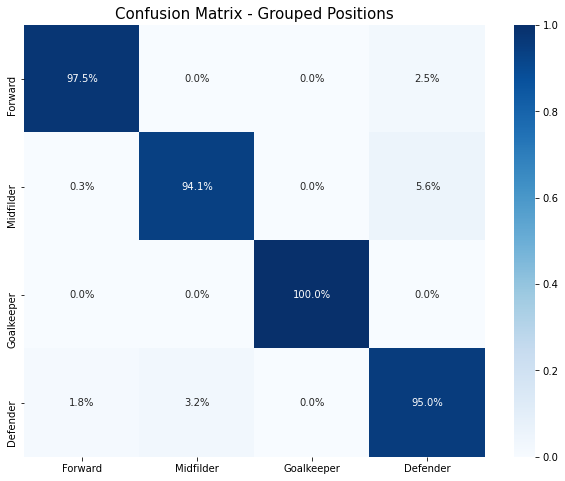

In [47]:
confmat_b = metrics.confusion_matrix(y_test_2, y_pred_boost_2, normalize ='true')
names_2 = list(df['main_position_g'].unique())

fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0,0,1,1])
sns.heatmap(confmat_b, annot=True, fmt='.1%', cmap='Blues')
ax.set_xticklabels(names_2)
ax.set_yticklabels(names_2)
ax.set_title('Confusion Matrix - Grouped Positions', size = 15)
plt.show()